In [24]:
from matplotlib.figure import Figure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [25]:
#Import the Dataset
Customer_Data = pd.read_csv("D:\Sem 5\ML\Mini Project\Mall_Customers.csv")
print(Customer_Data)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [26]:
Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
#Select the Annual Income column & Spending Score column
x = Customer_Data.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [28]:
#we can drop the "Gender" columns because we will not use it.
Customer_Data=Customer_Data.drop('Gender',axis=1)

In [29]:
#Finding wcss values for different number of clusters
#WCSS is the sum of squared distance between each point and the centroid in a cluster.
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)
print(wcss)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37265.86520484347, 30273.394312070042, 25043.890043290045, 21850.165282585633, 19740.010370359305]


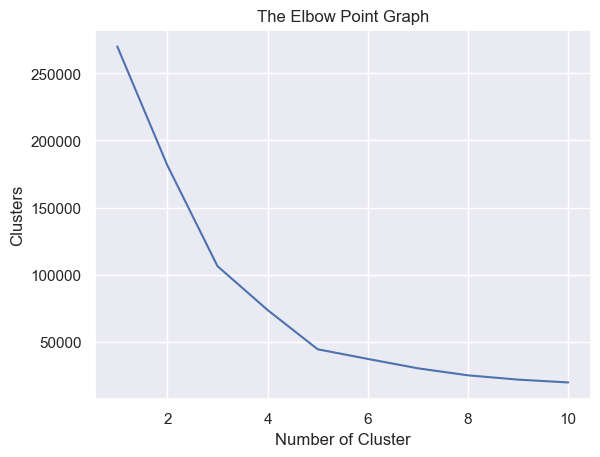

In [30]:
#aplot a graph 
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Cluster")
plt.ylabel("Clusters")
plt.show()

In [31]:
Q1 = Customer_Data.quantile(0.25)
Q3 = Customer_Data.quantile(0.75)
IQR = Q3 - Q1
((Customer_Data[Customer_Data.columns ]< (Q1 - 1.5 * IQR)) | (Customer_Data[Customer_Data.columns] > (Q3 + 1.5 * IQR))).sum()

CustomerID                0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64

In [32]:
# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Customer_data_scl=scaler.fit_transform(Customer_Data)

In [33]:
# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
from sklearn.preprocessing import normalize
norm=normalize(Customer_data_scl) 

In [34]:
# We can apply both (StandartScaler and Normalize) on our data before clustering. 
#normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging.
from sklearn.preprocessing import StandardScaler,normalize
df_norm=pd.DataFrame(norm)

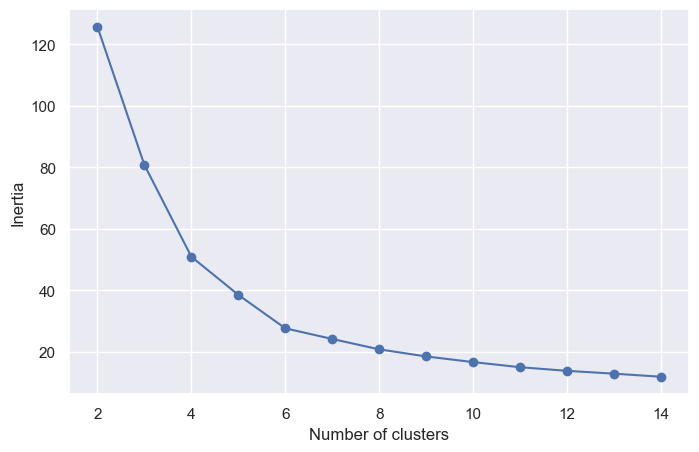

In [35]:
#KMeans Algorithm

from sklearn.cluster import KMeans
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [46]:
from sklearn import metrics
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.495 
Silhouette score for 6 clusters k-means : 0.52 
Silhouette score for 7 clusters k-means : 0.491 
Silhouette score for 8 clusters k-means : 0.486 
Silhouette score for 9 clusters k-means : 0.468 
Silhouette score for 10 clusters k-means : 0.467 


In [37]:
#Davies Bouldin that is defined as the average similarity measure of each cluster with its most similar cluster
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin Score:0.677
Davies Bouldin Score:0.762
Davies Bouldin Score:0.766


In [38]:
kmeans_labels=KMeans(n_clusters=7,random_state=123).fit_predict(df_norm)

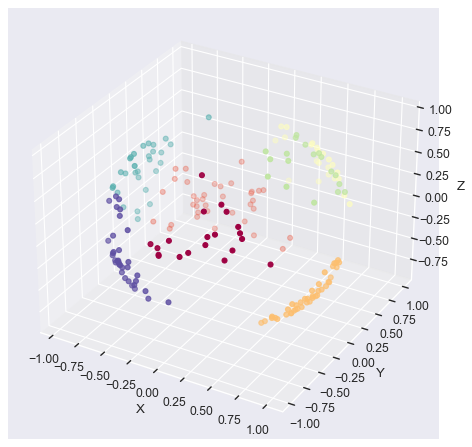

In [39]:
#prompt corrective action (PCA) Framework
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')
     

In [40]:
#DBSCAN Algorithm

from sklearn.cluster import DBSCAN
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
  for j in range(1,12):
      dbscan_cluster = DBSCAN(eps=i*0.2, min_samples=j)
      clusters=dbscan_cluster.fit_predict(df_norm)
      if len(np.unique(clusters))>2:
          results=results.append({'Eps':i*0.2,
                        'Min_Samples':j,
                        'Number of Cluster':len(np.unique(clusters)),
                        'Silhouette Score':metrics.silhouette_score(df_norm,clusters),
                        'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}, ignore_index=True)

C:\Users\sahil\AppData\Local\Temp\ipykernel_4312\3991917126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({'Eps':i*0.2,
C:\Users\sahil\AppData\Local\Temp\ipykernel_4312\3991917126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({'Eps':i*0.2,
C:\Users\sahil\AppData\Local\Temp\ipykernel_4312\3991917126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({'Eps':i*0.2,
C:\Users\sahil\AppData\Local\Temp\ipykernel_4312\3991917126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({'Eps':i*0.2,
C:\Users\sahil\AppData\Local\Temp\ipykernel_

In [41]:
results.sort_values('Silhouette Score',ascending=False)[:5]

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
21,0.4,11.0,5.0,0.353328,1.625170
3,0.2,4.0,8.0,0.352866,1.352682
2,0.2,3.0,10.0,0.345485,1.279013
20,0.4,10.0,4.0,0.334886,2.006367
19,0.4,9.0,4.0,0.310521,1.752300


In [42]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=4)
db_clusters=dbscan_cluster.fit_predict(df_norm)

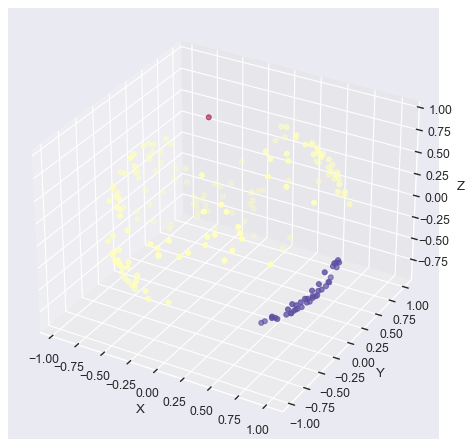

In [43]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=db_clusters,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')